###### ANALYTICS IN CREDIT CARD INDUSTRY:

Analytics has penetrated every industry owing to the various technology platforms that collect information and thus, the service providers know what exactly customers want.The Credit Card industry is no exception. Within credit card payment processing, there is a significant amount of data available that can be beneficial in countless ways.

Understanding the customer behaviour:

The data available from a credit card processor identifies the types of consumer and their
business spending behaviors. Hence, developing the marketing campaigns to directly
address their behaviors indeed grows the revenue and these considerations will result in
greater sales.

Personalize offering based on data results:

Data also reveals specific interests and needs in individual customers that a company can
leverage, this addressing their needs more efficiently. Specific promotions can be sent out
related to where these customers are located and this builds sales more quickly.

Use trends and patterns to get new customers:

The transactions and activities of the existing customers that they do in terms of purchase
behavior tends to reflect larger trends that are coming. This information provides a strategy
to go after possible customers in the target audience.

Uncover suspicious activity:

The data from credit card processing is becoming increasingly important as a tool to fight
fraud. When combined with artificial intelligence, this data is being analyzed quickly to
uncover areas of purchase activity.

Reduce chargebacks:

The ability to detect suspicious activity and patterns in data can also assess whether or not a
transaction might result in a chargeback. Using analytics to track each transaction reveals
anomalies. This information can help you reject that transaction and save your business
from chargebacks.

###### BUSINESS PROBLEM:

In order to effectively produce quality decisions in the modern credit card industry, knowledge
must be gained through effective data analysis and modeling. Through the use of dynamic datadriven
decision-making tools and procedures, information can be gathered to successfully evaluate
all aspects of credit card operations. PSPD Bank has banking operations in more than 50 countries
across the globe. Mr. Jim Watson, CEO, wants to evaluate areas of bankruptcy, fraud, and
collections, respond to customer requests for help with proactive offers and service.

###### DATA AVAILABLE -
This book has the following sheets:

Customer Acquisition: At the time of card issuing, company maintains the details of customers.

Spend (Transaction data): Credit card spend for each customer

Repayment: Credit card Payment done by customer

In [79]:
import pandas as pd
import numpy as np

Now lets import the data 

In [80]:
cust_aq=pd.read_csv("Customer Acqusition.csv")
repay=pd.read_csv("Repayment.csv")
spend=pd.read_csv("spend.csv")


In [81]:
cust_aq.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [82]:
repay.head(2)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN


In [83]:
spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


### Droping unwanted columns

In [84]:
del cust_aq["No"]

In [85]:
del spend["Sl No:"]

In [86]:
del repay["SL No:"]

In [87]:
del repay["Unnamed: 4"]

In [88]:
#OR u can drop by     >>> repay.drop(columns=['SL No:','Unnamed: 4'],axis=1,inplace=True)

In [89]:
cust_aq.shape

(100, 7)

In [90]:
spend.shape

(1500, 4)

In [91]:
repay.shape

(1523, 3)

### Merging the data 

We have 3Diferent dataset of including iformation about Customer Acqusition, repament and spend so lets combine those dataset using inner join.


In [92]:
cust_spd=pd.merge(left=cust_aq,right=spend,how="inner",left_on="Customer",right_on="Customer" )

In [93]:
credit_card_data=pd.merge(left=cust_spd,right=repay,how="inner",left_on="Customer",right_on="Customer")

In [94]:
credit_card_data.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Amount_x,Month_y,Amount_y
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,12-Jan-04,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,3-Jan-04,245899.02
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,15-Jan-04,259490.06
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,25-Jan-04,437555.12
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,17-Jan-05,165972.88


lest rename the columns to get clearity in data 

In [95]:
credit_card_data.rename(columns={"Month_x":"Spend_Month", 'Amount_x':'Spend_Amount','Month_y':'Repay_Month','Amount_y':'Repay_Amount'},inplace=True)

In [96]:
credit_card_data.head()

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Spend_Amount,Repay_Month,Repay_Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,12-Jan-04,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,3-Jan-04,245899.02
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,15-Jan-04,259490.06
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,25-Jan-04,437555.12
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,17-Jan-05,165972.88


In [97]:
credit_card_data.dtypes

Customer         object
Age               int64
City             object
Product          object
Limit           float64
Company          object
Segment          object
Spend_Month      object
Type             object
Spend_Amount    float64
Repay_Month      object
Repay_Amount    float64
dtype: object

Here spend month and repay month has to be in proper datetime format so lets convert it into proper format

In [98]:
credit_card_data['Spend_Month'] = pd.to_datetime(credit_card_data["Spend_Month"])
credit_card_data['Repay_Month'] = pd.to_datetime(credit_card_data["Repay_Month"])

In [99]:
credit_card_data.dtypes

Customer                object
Age                      int64
City                    object
Product                 object
Limit                  float64
Company                 object
Segment                 object
Spend_Month     datetime64[ns]
Type                    object
Spend_Amount           float64
Repay_Month     datetime64[ns]
Repay_Amount           float64
dtype: object

### 1. In the above dataset, 
-'a). In case age is less than 18, replace it with mean of age values.

In [100]:
age_mean=round(credit_card_data.Age.mean())

In [101]:
credit_card_data.loc[credit_card_data["Age"]<18,"Age"]=age_mean

In [102]:
credit_card_data.head()

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Spend_Amount,Repay_Month,Repay_Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-12,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-03,245899.02
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-15,259490.06
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-25,437555.12
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2005-01-17,165972.88


### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [103]:
(credit_card_data.Spend_Amount>credit_card_data.Limit).sum()

13994

In [104]:
credit_card_data['Spend_Amount'] =np.where((credit_card_data.Spend_Amount>credit_card_data.Limit),(credit_card_data.Limit/2),(credit_card_data.Spend_Amount))

In [162]:
(credit_card_data.Spend_Amount>credit_card_data.Limit).sum()

0

### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [166]:
(credit_card_data.Repay_Amount>credit_card_data.Limit).sum()

0

In [107]:
credit_card_data['Repay_Amount']=np.where((credit_card_data.Repay_Amount>credit_card_data.Limit),(credit_card_data.Limit),(credit_card_data.Repay_Amount))

In [108]:
(credit_card_data.Repay_Amount>credit_card_data.Limit).sum()

0

### 2. From the above dataset create the following summaries:


### a. At first lets check how  many distinct customers exist

In [109]:
distinct_cust=credit_card_data.loc[-credit_card_data["Customer"].duplicated(),"Customer"].count()

In [110]:
distinct_cust

100

### b. How many distinct categories are there in data

In [170]:
credit_card_data.loc[-credit_card_data["Product"].duplicated(),["Product"]].count()

Product    3
dtype: int64

There are 3 distinct product catagories are there in data 

### c. What is the average monthly spend by customers?

In [112]:
credit_card_data['Sp_Month'] = credit_card_data['Spend_Month'].apply(lambda x:x.month)

In [114]:
avg_montly_spend=credit_card_data.groupby(by=["Customer","Sp_Month"])[["Spend_Amount"]].mean().add_prefix("Avg_of").reset_index()

In [115]:
avg_montly_spend.round(2)

,Customer,Sp_Month,Avg_ofSpend_Amount
0,A1,1,372762.59
1,A1,2,175235.69
2,A1,4,261649.25
3,A1,5,361141.31
4,A1,8,344372.10
...,...,...,...
573,A95,1,240401.50
574,A96,1,54729.66
575,A97,1,5000.00
576,A98,1,5000.50


### Now let's check customers average monthly repayment 

In [116]:
credit_card_data["Rp_Month"]= credit_card_data["Repay_Month"].apply(lambda x : x.month)

In [117]:
credit_card_data.head()

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Spend_Amount,Repay_Month,Repay_Amount,Sp_Month,Rp_Month
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-12,495414.75,1,1
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-03,245899.02,1,1
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-15,259490.06,1,1
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-25,437555.12,1,1
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2005-01-17,165972.88,1,1


In [118]:
avg_montly_repay=credit_card_data.groupby(by=["Customer","Rp_Month"])[["Repay_Amount"]].mean().add_prefix("Avg_of_").reset_index()

In [119]:
avg_montly_repay.round(2)

,Customer,Rp_Month,Avg_of_Repay_Amount
0,A1,1,343972.33
1,A1,2,156374.76
2,A1,4,254474.58
3,A1,7,297176.74
4,A1,9,186427.50
...,...,...,...
553,A95,1,369405.96
554,A96,1,100000.00
555,A97,1,10000.00
556,A98,1,10001.00


### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [120]:
credit_card_data["monthly_profit"]=credit_card_data.Repay_Amount-credit_card_data.Spend_Amount

In [121]:
credit_card_data.head()

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Spend_Amount,Repay_Month,Repay_Amount,Sp_Month,Rp_Month,monthly_profit
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-12,495414.75,1,1,9943.95
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-03,245899.02,1,1,-239571.78
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-15,259490.06,1,1,-225980.74
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-25,437555.12,1,1,-47915.68
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2005-01-17,165972.88,1,1,-319497.92


In [192]:
credit_card_data['Profit']=np.where((credit_card_data["monthly_profit"]>0),(credit_card_data["monthly_profit"] * (2.9/100)),np.nan)

In [193]:
credit_card_data.head()

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Spend_Amount,Repay_Month,Repay_Amount,Sp_Month,Rp_Month,monthly_profit,Profit,Age_group,spend_year,Monthly,Yearly
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-12,495414.75,1,1,9943.95,288.37455,Senior,2004,January,2004
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-03,245899.02,1,1,-239571.78,NaN,Senior,2004,January,2004
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-15,259490.06,1,1,-225980.74,NaN,Senior,2004,January,2004
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-25,437555.12,1,1,-47915.68,NaN,Senior,2004,January,2004
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2005-01-17,165972.88,1,1,-319497.92,NaN,Senior,2004,January,2005


In [124]:
monthly_profit=credit_card_data.groupby(by=["Customer","Sp_Month","Rp_Month"])["Profit"].sum().reset_index()

In [125]:
monthly_profit.round(2)

,Customer,Sp_Month,Rp_Month,Profit
0,A1,1,1,85906.24
1,A1,1,2,19500.72
2,A1,1,4,16632.86
3,A1,1,7,7929.65
4,A1,1,9,4717.92
...,...,...,...,...
4526,A95,1,1,3741.13
4527,A96,1,1,1312.84
4528,A97,1,1,145.00
4529,A98,1,1,145.01


### f. What are the top 5 product types?

In [126]:
prod_type=credit_card_data.groupby(["Type"])[["Type"]].count().add_prefix("count_of").reset_index()

In [127]:
prod_type

,Type,count_ofType
0,AIR TICKET,3537
1,AUTO,971
2,BIKE,1255
3,BUS TICKET,2417
4,CAMERA,4237
5,CAR,682
6,CLOTHES,2243
7,FOOD,4056
8,JEWELLERY,2381
9,MOVIE TICKET,1820


In [128]:
top_five_prod=prod_type.sort_values(by=["count_ofType"],ascending=False).head(5)

In [129]:
top_five_prod

,Type,count_ofType
10,PETRO,4829
4,CAMERA,4237
7,FOOD,4056
0,AIR TICKET,3537
14,TRAIN TICKET,3387


### g. city having maximum spend

In [130]:
spend_of_city=credit_card_data.groupby(by=["City"])[["Spend_Amount"]].sum().reset_index()

In [131]:
spend_of_city

,City,Spend_Amount
0,BANGALORE,1.081315e+09
1,BOMBAY,7.597765e+08
2,CALCUTTA,1.114270e+09
3,CHENNAI,5.748714e+08
4,COCHIN,1.175903e+09
5,DELHI,2.629844e+08
6,PATNA,3.434695e+08
7,TRIVANDRUM,4.353974e+08


In [132]:
max_spend_by_city=spend_of_city.sort_values(by=["Spend_Amount"],ascending=False)[:1]

In [133]:
max_spend_by_city

,City,Spend_Amount
4,COCHIN,1.175903e+09


Cochin has the highest spend compare to other city

### h. Which age group is spending more money?

In [134]:
Age_group= np.where((credit_card_data.Age>=18)& (credit_card_data.Age<=25),"youth",
                   np.where((credit_card_data.Age>25)&(credit_card_data.Age<=60),"Adult","Senior"))

In [135]:
credit_card_data["Age_group"]= Age_group

In [136]:
credit_card_data.groupby(by=["Age_group"])["Spend_Amount"].sum().reset_index()

,Age_group,Spend_Amount
0,Adult,4.118967e+09
1,Senior,9.854105e+08
2,youth,6.436101e+08


##### Hence age group Adult(25 to 60) is spending more money. 

### i. Who are the top 10 customers in terms of repayment?

In [137]:
top_ten_cust=credit_card_data.groupby(by=["Customer"])["Repay_Amount"].sum().reset_index().sort_values(by="Repay_Amount",ascending=False)[:10]

In [138]:
top_ten_cust

,Customer,Repay_Amount
58,A61,4.004874e+08
57,A60,3.752990e+08
5,A13,2.967320e+08
38,A43,2.631860e+08
40,A45,2.618984e+08
4,A12,2.583776e+08
6,A14,2.462413e+08
39,A44,2.400866e+08
33,A39,2.362970e+08
37,A42,2.360793e+08


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [139]:
credit_card_data["spend_year"] = credit_card_data["Spend_Month"].apply(lambda x : x.year)

In [140]:
yearly_spend_by_city=credit_card_data.groupby(by=["City","Product","spend_year"])["Spend_Amount"].sum().reset_index()

In [141]:
yearly_spend_by_city_wide=yearly_spend_by_city.pivot_table(index="Product",columns="City",values="Spend_Amount")

In [142]:
yearly_spend_by_city_wide

City,BANGALORE,BOMBAY,CALCUTTA,CHENNAI,COCHIN,DELHI,PATNA,TRIVANDRUM
Product,,,,,,,,
Gold,3.114865e+08,2.133605e+08,2.635465e+08,6.290520e+07,2.642549e+08,6.475694e+07,62290691.49,5.752071e+07
Platimum,2.306019e+07,2.202312e+07,9.930175e+07,1.232566e+08,1.101480e+08,5.726757e+06,31514629.92,8.169208e+07
Silver,2.589161e+07,1.787517e+07,8.575153e+06,5.462034e+06,1.756482e+07,1.717778e+07,20684524.75,5.919693e+06


Bangalore has the highest spend amount amomg all the cities in gold and silver product catagory where as chennai in platinum product catagory 

In [143]:
import matplotlib

from matplotlib import pyplot as plt
import seaborn as sns

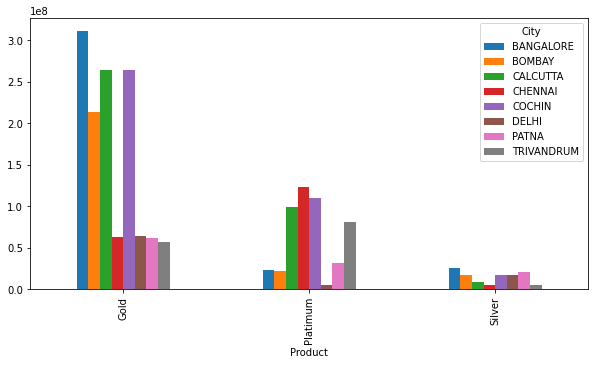

In [197]:
yearly_spend_by_city_wide.plot(kind="bar",figsize=(10,5))
plt.show()

BY Graphical representaion we can clearly see that in gold and silver product catagory blue line that is bangalore has the highest spend and red line that is chennai has highest spend in platinum product catagory

### 4. Create graphs for


### a. Monthly comparison of total spends, city wise

In [145]:
spend_by_city_wise=credit_card_data.groupby(by=["City"])["Spend_Amount"].sum()

In [146]:
spend_by_city_wise

City
BANGALORE     1.081315e+09
BOMBAY        7.597765e+08
CALCUTTA      1.114270e+09
CHENNAI       5.748714e+08
COCHIN        1.175903e+09
DELHI         2.629844e+08
PATNA         3.434695e+08
TRIVANDRUM    4.353974e+08
Name: Spend_Amount, dtype: float64

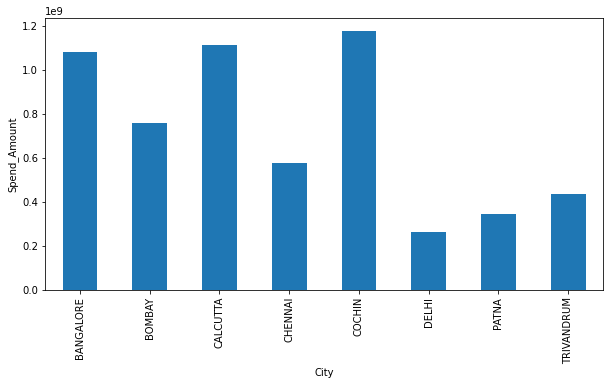

In [147]:
spend_by_city_wise.plot(kind = 'bar', legend=False, figsize=(10,5))
plt.ylabel('Spend_Amount')
plt.xlabel('City')
plt.show()

Among all cities Cochin has the highest overall spend followed by Calcutta,Banagalore and Bombay

### b. Comparison of yearly spend on air tickets

In [203]:
credit_card_data.head()

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Spend_Amount,Repay_Month,Repay_Amount,Sp_Month,Rp_Month,monthly_profit,Profit,Age_group,spend_year,Monthly,Yearly
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-12,495414.75,1,1,9943.95,288.37455,Senior,2004,January,2004
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-03,245899.02,1,1,-239571.78,NaN,Senior,2004,January,2004
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-15,259490.06,1,1,-225980.74,NaN,Senior,2004,January,2004
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-25,437555.12,1,1,-47915.68,NaN,Senior,2004,January,2004
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2005-01-17,165972.88,1,1,-319497.92,NaN,Senior,2004,January,2005


In [218]:
air_ticket=credit_card_data.loc[credit_card_data.Type=="AIR TICKET"]

In [219]:
air_ticket_yearly=air_ticket.groupby(by=["spend_year"])["Spend_Amount"].sum()

In [220]:
air_ticket_yearly

spend_year
2004    1.126823e+08
2005    2.878031e+08
2006    1.396326e+08
Name: Spend_Amount, dtype: float64

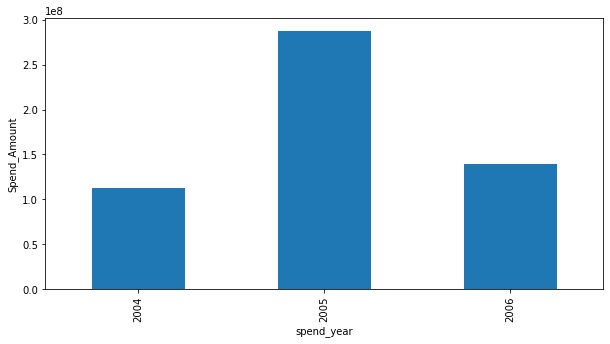

In [221]:
air_ticket_yearly.plot(kind = 'bar', legend=False, figsize=(10,5))
plt.ylabel('Spend_Amount')
plt.xlabel('spend_year')
plt.show()

We can observe that for air tickets in 2005 we have the highest spend among all the year.

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [237]:
monthly_spend=credit_card_data.groupby(by=["Product","Sp_Month"])["Spend_Amount"].sum().reset_index()

In [238]:
monthly_spend_wide=monthly_spend.pivot_table(index="Sp_Month",columns="Product",values="Spend_Amount")

In [239]:
monthly_spend_wide

Product,Gold,Platimum,Silver
Sp_Month,,,
1,8.507658e+08,3.919087e+08,96408029.18
2,6.330246e+08,2.516036e+08,41080764.24
3,5.096947e+08,1.942044e+08,57089253.13
4,3.513289e+08,1.332545e+08,44983650.40
5,5.961399e+08,2.119807e+08,45554826.55
6,1.910250e+08,8.224614e+07,18768070.55
7,1.492207e+08,3.586312e+07,13114119.94
8,1.351418e+08,4.622154e+07,7374587.70
9,1.124056e+08,4.432547e+07,9605663.01


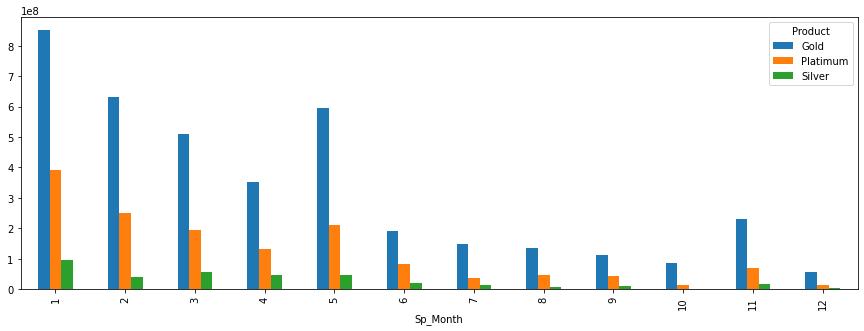

In [240]:
monthly_spend_wide.plot(kind="bar",figsize=(15,5))
plt.show()

### 5. Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.


In [156]:
credit_card_data.head()

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Spend_Amount,Repay_Month,Repay_Amount,Sp_Month,Rp_Month,monthly_profit,Profit,Age_group,spend_year
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-12,495414.75,1,1,9943.95,288.37455,Senior,2004
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-03,245899.02,1,1,-239571.78,NaN,Senior,2004
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-15,259490.06,1,1,-225980.74,NaN,Senior,2004
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-25,437555.12,1,1,-47915.68,NaN,Senior,2004
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2005-01-17,165972.88,1,1,-319497.92,NaN,Senior,2004


In [157]:
credit_card_data['Monthly'] = credit_card_data['Repay_Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
credit_card_data['Yearly'] = credit_card_data['Repay_Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [158]:
credit_card_data

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Spend_Amount,Repay_Month,Repay_Amount,Sp_Month,Rp_Month,monthly_profit,Profit,Age_group,spend_year,Monthly,Yearly
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-12,495414.75,1,1,9943.95,288.37455,Senior,2004,January,2004
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-03,245899.02,1,1,-239571.78,NaN,Senior,2004,January,2004
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-15,259490.06,1,1,-225980.74,NaN,Senior,2004,January,2004
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-25,437555.12,1,1,-47915.68,NaN,Senior,2004,January,2004
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2005-01-17,165972.88,1,1,-319497.92,NaN,Senior,2004,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,2004-01-25,100000.00,1,1,45270.34,1312.83986,Adult,2004,January,2004
37280,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,2004-01-12,10000.00,1,1,5000.00,145.00000,Adult,2004,January,2004
37281,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,2004-01-03,10001.00,1,1,5000.50,145.01450,Adult,2004,January,2004
37282,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,2004-01-15,10002.00,1,1,5001.00,145.02900,Adult,2004,January,2004


In [261]:
product=input("Product_name:")
timeperiod =input("Timeperiod:")

def summary_report(product,timeperiod):
    
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = credit_card_data.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Repay_Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = credit_card_data.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Repay_Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = credit_card_data.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Repay_Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = credit_card_data.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Repay_Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot = credit_card_data.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Repay_Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot = credit_card_data.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Repay_Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result

summary_report(product,timeperiod)

Product_name:gold
Timeperiod:yearly


Yearly                               2004          2005          2006
Product City       Customer                                          
Gold    BANGALORE  A1        4.247636e+07  2.752486e+07  1.556523e+07
                   A13       7.244740e+07  1.164879e+08  1.077968e+08
                   A14       8.587810e+07  7.725143e+07  8.311180e+07
                   A30       2.642698e+07  7.202915e+07  6.714788e+07
                   A43       5.910142e+07  1.242157e+08  7.986894e+07
                   A63       2.366567e+06           NaN  6.333514e+05
                   A81                NaN           NaN  2.077803e+05
                   A88                NaN           NaN  1.468213e+05
                   A92                NaN           NaN  4.591057e+05
        BOMBAY     A12       7.251151e+07  8.920524e+07  9.666082e+07
                   A17       2.850896e+07  1.462288e+07  6.255566e+07
                   A42       9.442336e+07  9.689851e+07  4.475742e+07
                   A62       3.313817e+07  2.929073e+07  3.199763e+07
                   A91                NaN           NaN  2.477810e+05
        CALCUTTA   A10       1.605943e+07  2.244319e+07  2.801904e+07
                   A15       2.103005e+07  3.441538e+07  5.566283e+07
                   A29       3.717344e+07  4.608304e+07  9.272605e+07
                   A31       5.706388e+06  2.028098e+07  2.138918e+07
                   A60       1.098474e+08  1.422285e+08  1.232231e+08
                   A89                NaN           NaN  4.972380e+05
        CHENNAI    A27       4.975622e+07  7.512998e+07  6.446212e+07
                   A67       1.356912e+05  1.112775e+05           NaN
        COCHIN     A11       1.725402e+07  3.681848e+07  4.152432e+07
                   A16       2.244422e+07  2.452494e+07  3.822739e+07
                   A32       4.820377e+06  9.753428e+06  2.124232e+07
                   A45       7.929637e+07  1.253159e+08  5.728614e+07
                   A61       9.568989e+07  1.625207e+08  1.422768e+08
                   A65       9.378452e+05  4.613347e+05           NaN
                   A90                NaN           NaN  1.099313e+05
                   A94       1.534659e+05           NaN           NaN
        DELHI      A44       6.663089e+07  1.291249e+08  4.433089e+07
                   A64                NaN           NaN  6.464582e+05
                   A82                NaN           NaN  3.422007e+05
                   A93       3.423261e+05           NaN           NaN
        PATNA      A26       4.024155e+07  6.571362e+07  8.992138e+07
                   A66       9.540796e+05           NaN  2.261892e+05
                   A95       3.694060e+05           NaN           NaN
        TRIVANDRUM A28       2.605793e+07  7.632927e+07  9.116860e+07

In [248]:
credit_card_data

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Spend_Amount,Repay_Month,Repay_Amount,Sp_Month,Rp_Month,monthly_profit,Profit,Age_group,spend_year,Monthly,Yearly
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-12,495414.75,1,1,9943.95,288.37455,Senior,2004,January,2004
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-03,245899.02,1,1,-239571.78,NaN,Senior,2004,January,2004
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-15,259490.06,1,1,-225980.74,NaN,Senior,2004,January,2004
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-25,437555.12,1,1,-47915.68,NaN,Senior,2004,January,2004
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2005-01-17,165972.88,1,1,-319497.92,NaN,Senior,2004,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,2004-01-25,100000.00,1,1,45270.34,1312.83986,Adult,2004,January,2004
37280,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,2004-01-12,10000.00,1,1,5000.00,145.00000,Adult,2004,January,2004
37281,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,2004-01-03,10001.00,1,1,5000.50,145.01450,Adult,2004,January,2004
37282,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,2004-01-15,10002.00,1,1,5001.00,145.02900,Adult,2004,January,2004


In [263]:
cc=credit_card_data.groupby(["Customer","City","Product","Yearly"])["Repay_Amount"].sum().reset_index()

In [265]:
cc.loc[cc.Product=="Gold"]

,Customer,City,Product,Yearly,Repay_Amount
0,A1,BANGALORE,Gold,2004,42476361.12
1,A1,BANGALORE,Gold,2005,27524857.86
2,A1,BANGALORE,Gold,2006,15565231.08
3,A10,CALCUTTA,Gold,2004,16059429.54
4,A10,CALCUTTA,Gold,2005,22443190.74
...,...,...,...,...,...
222,A91,BOMBAY,Gold,2006,247781.00
223,A92,BANGALORE,Gold,2006,459105.69
224,A93,DELHI,Gold,2004,342326.14
225,A94,COCHIN,Gold,2004,153465.89


In [264]:
cc

,Customer,City,Product,Yearly,Repay_Amount
0,A1,BANGALORE,Gold,2004,42476361.12
1,A1,BANGALORE,Gold,2005,27524857.86
2,A1,BANGALORE,Gold,2006,15565231.08
3,A10,CALCUTTA,Gold,2004,16059429.54
4,A10,CALCUTTA,Gold,2005,22443190.74
...,...,...,...,...,...
226,A95,PATNA,Gold,2004,369405.96
227,A96,CHENNAI,Silver,2004,100000.00
228,A97,TRIVANDRUM,Platimum,2004,10000.00
229,A98,CALCUTTA,Platimum,2004,10001.00
